In [17]:
import torch
import torchvision
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from skimage.transform import radon

In [18]:
mnist_train_dataset = datasets.MNIST(root = './data', train = True, download = True)
mnist_test_dataset = datasets.MNIST(root = './data', train = False, download = True)

In [19]:
# Radon Matrix exists for every angle and every line. matrix 
def getRadonMatrix(theta,ny,nx):
    colum_of_A = radon(np.zeros((ny,nx)), theta = theta) # this is only to know the size
    A = np.zeros((colum_of_A.size, nx*ny))
    for i in range(ny):
        for j in range(nx):
            basis_vec = np.zeros((ny,nx))
            basis_vec[i,j] = 1
            colum_of_A = radon(basis_vec, theta = theta)
            A[:,j+i*nx] = np.reshape(colum_of_A, colum_of_A.size)
    return sin

In [20]:
A = getRadonMatrix(10, 28, 28)

TypeError: object of type 'int' has no len()

In [12]:
sinogram = []
for img,_ in mnist_train_dataset.data:
    sinogram.append(radon(img, theta))
    print(sinogram)

ValueError: too many values to unpack (expected 2)

In [10]:
print(mnist_train_dataset.data[0].dim())
theta = np.linspace(0, 180, 14, endpoint = False)
sinogram =[]

2


In [13]:
#sinogram.append(radon(mnist_train_dataset.data, theta))
#print(mnist_train_dataset.data[0])
#plt.imshow(mnist_train_dataset.data[0])
#print(sinogram)

image: <PIL.Image.Image image mode=L size=28x28 at 0x1E05896D280>
label: 5


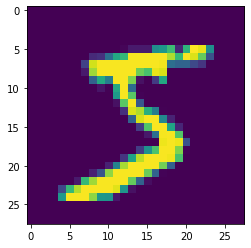

In [41]:
train_image, train_label = mnist_train_dataset[0]
print('image:',train_image )
print('label:',train_label)
plt.imshow(train_image)
#plt.imshow(train_image, , cmap ='gray') for gray scale image display

In [7]:
import numpy as np
theta = np.linspace(0,180,11,endpoint = False)
print(theta)
theta = np.linspace(0,180,11,endpoint = True)
print(theta)

[  0.          16.36363636  32.72727273  49.09090909  65.45454545
  81.81818182  98.18181818 114.54545455 130.90909091 147.27272727
 163.63636364]
[  0.  18.  36.  54.  72.  90. 108. 126. 144. 162. 180.]


In [2]:
#Radon Matrix Construction
def getRadonMatric(theta,ny,nx):
    sinogram = radon(np.zeros((ny,nx)), theta = theta)